## MDP Formulation
### State space
$S = \{(t_j, x_i)\}_{0\leq i\leq 10 \\ 0\leq j\leq100}$ with $x$ the remaining capacity and $t$ the number of micro-times before departure.  

### Action space
$A = \{p_1, p_2, p_3\}$ with $p_1 > p_2 > p_3$ the prices.

### Model Dynamics

If the agent is in $s = (x, t)$ and executes the action $p$ then:  
- $s' = (x-1, t-1)$ and $r = p$ with a probability equal to $\lambda(t)e^{-\alpha(t)(\frac{p}{p_3}-1)} = 0.2e^{-0.8(\frac{p}{p_3}-1)}$  
- $s' = (x, t-1)$ and $r = 0$ with a probability equal to  $1-\lambda(t)e^{-\alpha(t)(\frac{p}{p_n}-1)} = 1-0.2e^{-0.8(\frac{p}{p_3}-1)}$  

The game ends when $t = 0$ or $x = 0$.  
Since we use $100$ micro-times and we set the arrival probability $\lambda(t)$ to $0.2$ then we expect to have a total number of arrivals equal to $20$.

## Value Iteration
Here is the value iteration algorithm:

In [1]:
def value_iteration(env, gamma, max_iter, epsilon):
    U = np.zeros(env.nS)
    for i in range(max_iter):
        prev_U = np.copy(U)
        for s in range(env.nS):
            list_sum = np.zeros(env.nA)
            for a in range(env.nA):
                for p, s_prime, r, _ in env.P[s][a]:
                    list_sum[a] += p*(r + gamma*prev_U[s_prime])
            U[s] = max(list_sum)
        if (np.sum(np.fabs(prev_U - U)) <= epsilon):
            break
    return U

And the function allowing us to visualize the optimal values of each state computed by the algorithm:

In [2]:
def visualisation_value(V, T, C):
    V = V.reshape(T, C)
    plt.title("Values of the states")
    plt.xlabel('Capacity')
    plt.ylabel('Number of micro-times')
    plt.imshow(V)
    plt.colorbar()
    return plt.show()

Here are the results that we get:

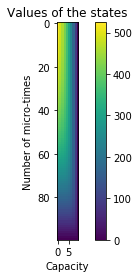

In [11]:
import numpy as np
import gym
import matplotlib.pyplot as plt

max_iter = 1000000
epsilon = 1e-20
gamma = 0.99
env = gym.make('gym_RM:RM-v0')
env = env.unwrapped
T, C = 100, 10
v = value_iteration(env, gamma, max_iter, epsilon)
visualisation_value(v, T, C)
    

If we look at what are the optimal prices computed for each state by the policy coming from the value iteration algorithm here is what we get:

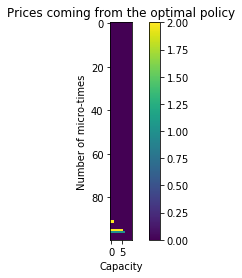

In [15]:
def extract_policy(U):
    policy = np.zeros(env.nS)
    for s in range(env.nS):
        list_sum = np.zeros(env.nA)
        for a in range(env.nA):
            for p, s_prime, r, _ in env.P[s][a]:
                list_sum[a] += p*U[s_prime]
        policy[s] = np.argmax(list_sum)
    return policy

def visualisation_policy(P, T, C):
    P = P.reshape(T, C)
    plt.imshow(P)
    plt.title("Prices coming from the optimal policy")
    plt.xlabel('Capacity')
    plt.ylabel('Number of micro-times')
    plt.colorbar()
    return plt.show()

policy = extract_policy(v)
visualisation_policy(policy, T, C)

## DQL

